# EDA
In this notebook I will use ML in order to find which features are the most important in context of employees attrition. For this purpose I will use machine learning models and see whatfeatures they see as most important. What is important to note, is the fact that, we are not focusing on the model's accuracy/precision/etc. Here is the approximate plan of what I will do:

## PLAN
1. Get the data, prepare it, basci preparation for model training ✅
2. Train models and see which features are most valuable + SHAP✅
3. Interpretation & Visualization
    * Compare lists of features
    * Identify 5-10 most influential features for each model
    * Visualize top 5/10 features

### 0. Import tools ⚒️

In [1]:
# This tools are mainly used to work with data and visualize them
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Normalization
from sklearn.preprocessing import MinMaxScaler

# feature importance 
import shap

In [2]:
# Show all columns
pd.set_option('display.max_columns', None)

### 1. DATA 📈

In [3]:
df = pd.read_csv(r"C:\Users\Adam\Desktop\main\programming\Data An EN\projects\IBM HR Employee Atttition\data\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
# as a remainder:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### NOTE 
As you can see there is a lot of non-numeric features. Therefore, we need to encode them since most machine learning models are not able to work with such. Linear models tend to get mislead if label encoding will be used and if I used one hot encoding dat would get messy and harder to interprete. For this reason I will use label encoding and avoid using linear models, lasso etc. Also I will drop some useleff features like: EmployeeCount, EmployeeNumber, Over18

In [6]:
df_copy = df.copy(deep=True)
df_copy.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [7]:
# Delete redundant features
features_to_delete = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
df_copy = df_copy.drop(features_to_delete, axis=1)

In [8]:
# Prepare label encoder
label_encoder = preprocessing.LabelEncoder()

In [9]:
for column in df_copy.columns:
    if df_copy[column].dtype == 'object':
        df_copy[column] = label_encoder.fit_transform(df_copy[column])

In [10]:
df_copy.dtypes

Age                         int64
Attrition                   int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLast

### NOTE 
After cocideration I have decided that I will also normalize features. For experimental purposes I will use models like KNN, SVM etc.

In [11]:
# List of the features to scale
for_scaling = ['Age', 'DailyRate','DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
               'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears',
              'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [12]:
# Scale
scaler = MinMaxScaler()
df_copy[for_scaling] = scaler.fit_transform(df_copy[for_scaling])

In [13]:
df_copy.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,0.428571,0,1,0.559771,1,0.785714,2,3,3,1,0.157143,4,2,2,4,1,0.082254,0.409396,0.444444,0,0.428571,3,3,1,0.425,0.500000,3,0.125,0.111111,0.000000,0.176471
1466,0.500000,0,2,0.365784,1,0.178571,1,3,4,1,0.171429,2,3,0,1,1,0.472986,0.777474,0.444444,0,0.285714,3,1,1,0.225,0.833333,3,0.175,0.388889,0.066667,0.411765
1467,0.214286,0,2,0.037938,1,0.107143,3,1,2,1,0.814286,4,2,4,2,1,0.270300,0.123670,0.111111,1,0.642857,4,2,1,0.150,0.000000,3,0.150,0.111111,0.000000,0.176471
1468,0.738095,0,1,0.659270,2,0.035714,3,3,4,1,0.471429,2,2,7,2,1,0.230700,0.447661,0.222222,0,0.214286,3,4,0,0.425,0.500000,2,0.225,0.333333,0.000000,0.470588
1469,0.380952,0,2,0.376521,1,0.250000,3,3,2,1,0.742857,4,2,2,3,1,0.178778,0.326601,0.222222,0,0.071429,3,1,0,0.150,0.500000,4,0.100,0.166667,0.066667,0.117647


### 2. Train models 💪
Greate! First steps are behind us. Now it is time to train our models. We will start with the **tree based models** (RandomForestClassifier, XGBoost, LightGBM) then we will compute **SHAP** values to understand the impact of each feature on attrition, after all of these I will use **RFE** to iteratively remove less important features. Since we are not focused on prediction we can train our models on the whole dataset.

In [14]:
# import models
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

In [15]:
# split the data into X and Y
X = df_copy.drop('Attrition', axis=1)
y = df_copy['Attrition']

In [16]:
# XGBClassifier
xgb = XGBClassifier()
xgb.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

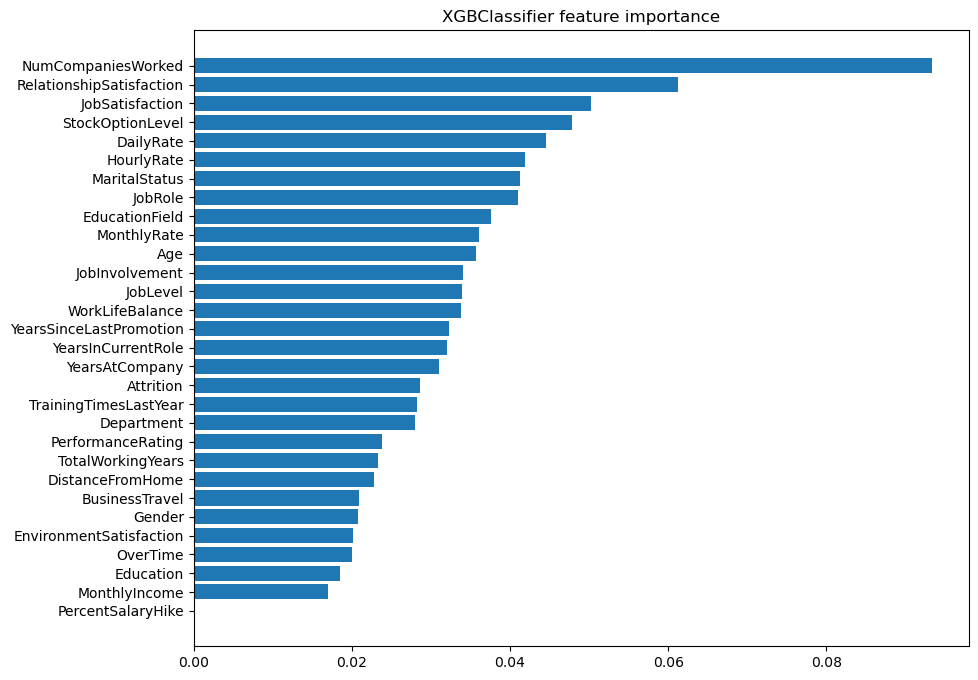

In [52]:
# Get features, sort them and visualize them
features_sorted = xgb.feature_importances_.argsort()
plt.figure(figsize=(10,8))
plt.barh(df_copy.columns[features_sorted], xgb.feature_importances_[features_sorted])
plt.title('XGBClassifier feature importance')
plt.show()

In [18]:
df_copy.columns[features_sorted][::-1]

Index(['NumCompaniesWorked', 'RelationshipSatisfaction', 'JobSatisfaction',
       'StockOptionLevel', 'DailyRate', 'HourlyRate', 'MaritalStatus',
       'JobRole', 'EducationField', 'MonthlyRate', 'Age', 'JobInvolvement',
       'JobLevel', 'WorkLifeBalance', 'YearsSinceLastPromotion',
       'YearsInCurrentRole', 'YearsAtCompany', 'Attrition',
       'TrainingTimesLastYear', 'Department', 'PerformanceRating',
       'TotalWorkingYears', 'DistanceFromHome', 'BusinessTravel', 'Gender',
       'EnvironmentSatisfaction', 'OverTime', 'Education', 'MonthlyIncome',
       'PercentSalaryHike'],
      dtype='object')

In [19]:
feature_importance = {'XGBClassifier': df_copy.columns[features_sorted][::-1]}

In [20]:
# RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X,y)

RandomForestClassifier()

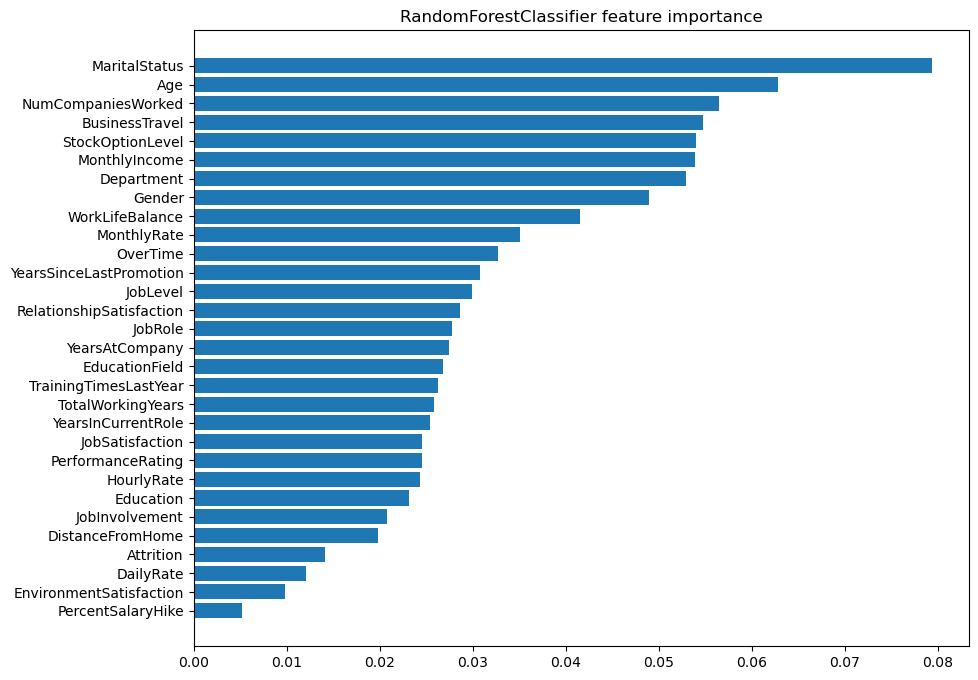

In [21]:
features_sorted_rfc= rfc.feature_importances_.argsort()
plt.figure(figsize=(10,8))
plt.barh(df_copy.columns[features_sorted_rfc], rfc.feature_importances_[features_sorted_rfc])
plt.title('RandomForestClassifier feature importance')
plt.show()

In [22]:
feature_importance['RandomForestClassifier'] = df_copy.columns[features_sorted_rfc][::-1]
feature_importance

{'XGBClassifier': Index(['NumCompaniesWorked', 'RelationshipSatisfaction', 'JobSatisfaction',
        'StockOptionLevel', 'DailyRate', 'HourlyRate', 'MaritalStatus',
        'JobRole', 'EducationField', 'MonthlyRate', 'Age', 'JobInvolvement',
        'JobLevel', 'WorkLifeBalance', 'YearsSinceLastPromotion',
        'YearsInCurrentRole', 'YearsAtCompany', 'Attrition',
        'TrainingTimesLastYear', 'Department', 'PerformanceRating',
        'TotalWorkingYears', 'DistanceFromHome', 'BusinessTravel', 'Gender',
        'EnvironmentSatisfaction', 'OverTime', 'Education', 'MonthlyIncome',
        'PercentSalaryHike'],
       dtype='object'),
 'RandomForestClassifier': Index(['MaritalStatus', 'Age', 'NumCompaniesWorked', 'BusinessTravel',
        'StockOptionLevel', 'MonthlyIncome', 'Department', 'Gender',
        'WorkLifeBalance', 'MonthlyRate', 'OverTime', 'YearsSinceLastPromotion',
        'JobLevel', 'RelationshipSatisfaction', 'JobRole', 'YearsAtCompany',
        'EducationField', 'Tr

In [23]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"

In [24]:
#Lightgbm
lgbm = LGBMClassifier()
lgbm.fit(X,y)

[LightGBM] [Info] Number of positive: 237, number of negative: 1233
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000657 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1134
[LightGBM] [Info] Number of data points in the train set: 1470, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161224 -> initscore=-1.649145
[LightGBM] [Info] Start training from score -1.649145


LGBMClassifier()

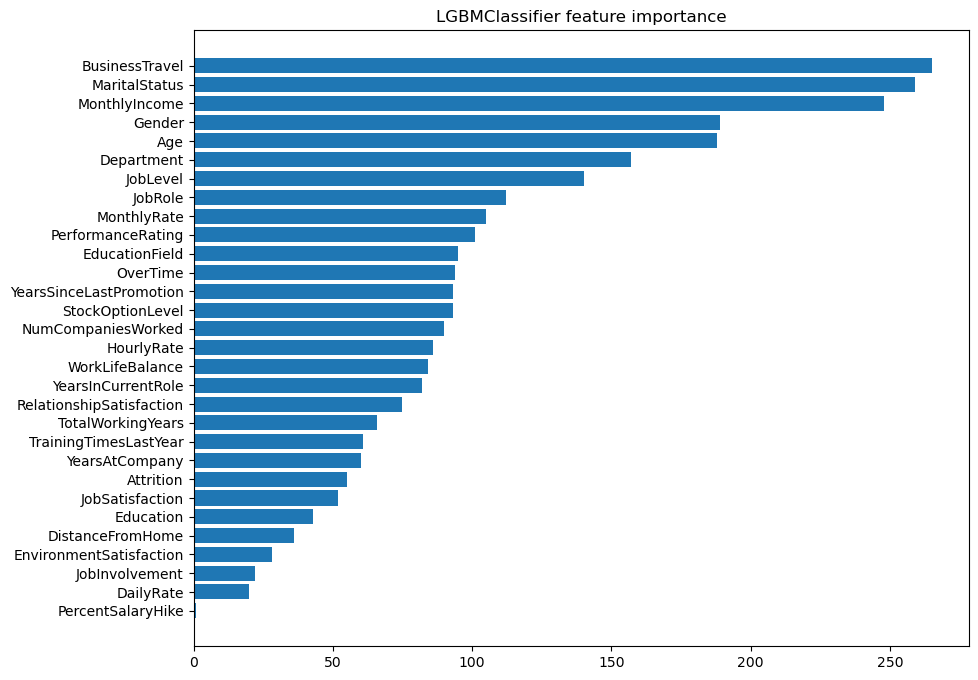

In [25]:
features_sorted_lgbm = lgbm.feature_importances_.argsort()
plt.figure(figsize=(10,8))
plt.barh(df_copy.columns[features_sorted_lgbm], lgbm.feature_importances_[features_sorted_lgbm])
plt.title('LGBMClassifier feature importance')
plt.show()

In [26]:
feature_importance['LGBMClassifier'] = df_copy.columns[features_sorted_lgbm][::-1]
feature_importance

{'XGBClassifier': Index(['NumCompaniesWorked', 'RelationshipSatisfaction', 'JobSatisfaction',
        'StockOptionLevel', 'DailyRate', 'HourlyRate', 'MaritalStatus',
        'JobRole', 'EducationField', 'MonthlyRate', 'Age', 'JobInvolvement',
        'JobLevel', 'WorkLifeBalance', 'YearsSinceLastPromotion',
        'YearsInCurrentRole', 'YearsAtCompany', 'Attrition',
        'TrainingTimesLastYear', 'Department', 'PerformanceRating',
        'TotalWorkingYears', 'DistanceFromHome', 'BusinessTravel', 'Gender',
        'EnvironmentSatisfaction', 'OverTime', 'Education', 'MonthlyIncome',
        'PercentSalaryHike'],
       dtype='object'),
 'RandomForestClassifier': Index(['MaritalStatus', 'Age', 'NumCompaniesWorked', 'BusinessTravel',
        'StockOptionLevel', 'MonthlyIncome', 'Department', 'Gender',
        'WorkLifeBalance', 'MonthlyRate', 'OverTime', 'YearsSinceLastPromotion',
        'JobLevel', 'RelationshipSatisfaction', 'JobRole', 'YearsAtCompany',
        'EducationField', 'Tr

In [27]:
# SHAP
# Split the data first. I will use stratify in order to handle imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

# Train LightGBM. This model seems like the best choice for many reasons (built in imblance handling, fast shap values computing and more)
lgb_clf = LGBMClassifier(class_weight='balanced', random_state=42)
lgb_clf.fit(X_train, y_train)

# Compute SHAP values
explainer = shap.TreeExplainer(lgb_clf)
shap_values = explainer.shap_values(X_test)

[LightGBM] [Info] Number of positive: 190, number of negative: 986
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000275 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1130
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


C:\Users\Adam\anaconda3\envs\ibm_hr_analytics\lib\site-packages\shap\explainers\_tree.py:544: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


In [28]:
shap_values_abs =  np.abs(shap_values).mean(axis=0)

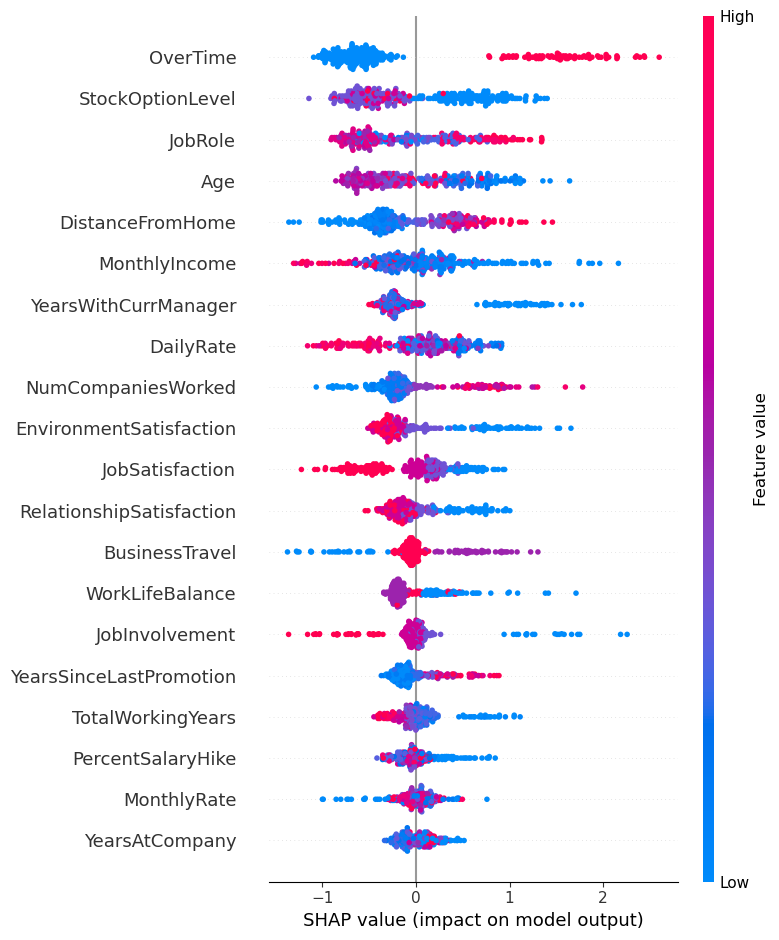

<Figure size 640x480 with 0 Axes>

In [69]:
shap.summary_plot(shap_values, X_test)
plt.gcf().savefig('SHAPbeesSummary.png', bbox_inches='tight')

In [73]:
plt.figure(figsize=(10,6))
shap.summary_plot(shap_values, X_test, show=False)
plt.savefig('SHAPbeesSummary.png', bbox_inches='tight')
plt.close()

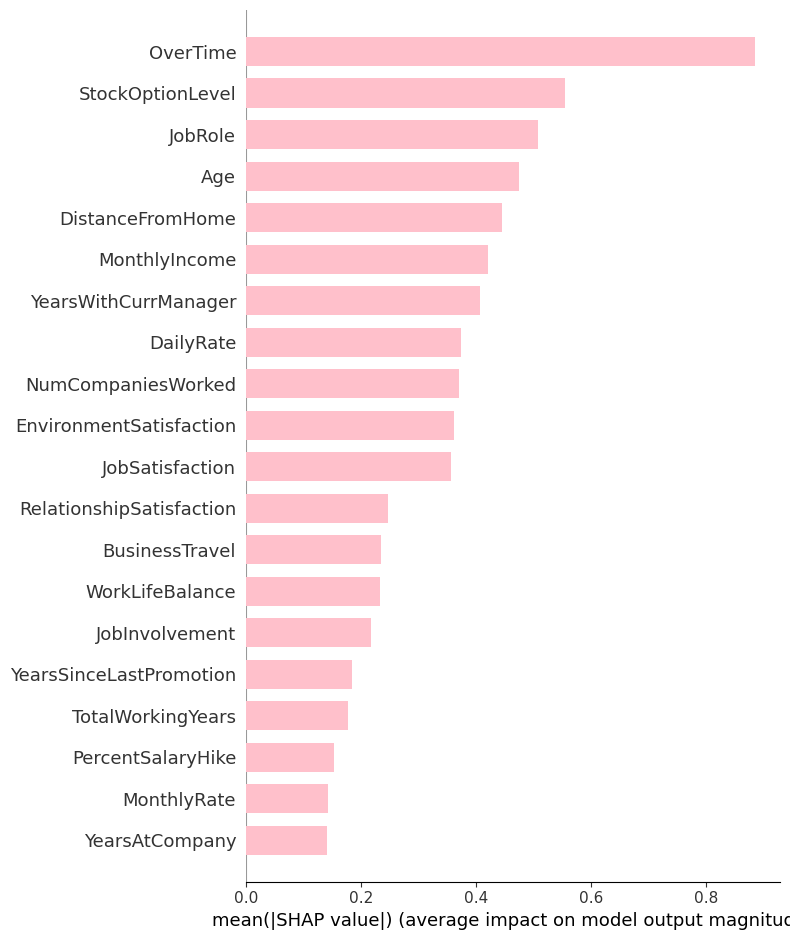

In [30]:
shap.summary_plot(shap_values, X_test, plot_type='bar', color='pink')

### NOTE 
Nowe we neeg to merge feature importances and rank the features. In order to do this I will combine feature importances of each model using L1 normalization. This will help us rank features equally. Then I will concider usgin and adding to our calculation SHAP values. First we need to check how diffrent models sum importances. 

In [31]:
# If print 1 then model already sum to 1 which mean that we do not need to use L1 normalization
# in other cases it is required
print(np.sum(xgb.feature_importances_))

1.0


In [32]:
print(np.sum(rfc.feature_importances_))

1.0


In [33]:
print(np.sum(lgbm.feature_importances_))

3000


In [34]:
def normalized_importances(model, feature_names):
    """
    Get feature importances and normalize them using L1 normalization.
    Arguments:
        model: Trained model (need to have feature_importances_ attritbute)
        feature_names: name of features used in model training
    Returns:
        DataFrame with feature names and importances
    """
    
    # Get feature importances
    importances = model.feature_importances_
    # Normalize feature importances using L1 normalization
    normalized = importances/ np.sum(importances)
    return pd.DataFrame({'Feature': feature_names, 'Normalized': normalized, 'Original': importances})

### NOTE
As an example let's see if XGBoostClassifier has already normalized features. If so then normalized importances should be equal to the original importances.

In [35]:
xgb_importance_df = normalized_importances(xgb, X_train.columns)
xgb_importance_df

,Feature,Normalized,Original
0,Age,0.035668,0.035668
1,BusinessTravel,0.028617,0.028617
2,DailyRate,0.020901,0.020901
3,Department,0.044533,0.044533
4,DistanceFromHome,0.028037,0.028037
5,Education,0.022844,0.022844
6,EducationField,0.018529,0.018529
7,EnvironmentSatisfaction,0.037604,0.037604
8,Gender,0.020137,0.020137
9,HourlyRate,0.020737,0.020737


In [36]:
lgbm_importances_df = normalized_importances(lgbm, X_train.columns)
lgbm_importances_df

,Feature,Normalized,Original
0,Age,0.062667,188
1,BusinessTravel,0.018333,55
2,DailyRate,0.088333,265
3,Department,0.006667,20
4,DistanceFromHome,0.052333,157
5,Education,0.012000,36
6,EducationField,0.014333,43
7,EnvironmentSatisfaction,0.031667,95
8,Gender,0.009333,28
9,HourlyRate,0.063000,189


In [37]:
lgbm_importances_df = lgbm_importances_df.rename(columns={'Normalized':'Normalized_LGBM'})
lgbm_importances_df

,Feature,Normalized_LGBM,Original
0,Age,0.062667,188
1,BusinessTravel,0.018333,55
2,DailyRate,0.088333,265
3,Department,0.006667,20
4,DistanceFromHome,0.052333,157
5,Education,0.012000,36
6,EducationField,0.014333,43
7,EnvironmentSatisfaction,0.031667,95
8,Gender,0.009333,28
9,HourlyRate,0.063000,189


In [38]:
lgbm_importances_df = lgbm_importances_df.drop('Original', axis=1)
xgb_importance_df = xgb_importance_df.drop('Original', axis=1)
xgb_importance_df

,Feature,Normalized
0,Age,0.035668
1,BusinessTravel,0.028617
2,DailyRate,0.020901
3,Department,0.044533
4,DistanceFromHome,0.028037
5,Education,0.022844
6,EducationField,0.018529
7,EnvironmentSatisfaction,0.037604
8,Gender,0.020137
9,HourlyRate,0.020737


In [39]:
rfc_importances_df = pd.DataFrame({'Feature': X_train.columns,'Normalized':rfc.feature_importances_})

# merge all columns
df_importance = rfc_importances_df.merge(xgb_importance_df, on='Feature', suffixes=('_RF','_XGB'))
df_importance.head()

,Feature,Normalized_RF,Normalized_XGB
0,Age,0.062858,0.035668
1,BusinessTravel,0.014146,0.028617
2,DailyRate,0.054801,0.020901
3,Department,0.012053,0.044533
4,DistanceFromHome,0.052919,0.028037


In [40]:
df_importance = df_importance.merge(lgbm_importances_df, on='Feature')
df_importance

,Feature,Normalized_RF,Normalized_XGB,Normalized_LGBM
0,Age,0.062858,0.035668,0.062667
1,BusinessTravel,0.014146,0.028617,0.018333
2,DailyRate,0.054801,0.020901,0.088333
3,Department,0.012053,0.044533,0.006667
4,DistanceFromHome,0.052919,0.028037,0.052333
5,Education,0.019788,0.022844,0.012000
6,EducationField,0.023107,0.018529,0.014333
7,EnvironmentSatisfaction,0.026816,0.037604,0.031667
8,Gender,0.009779,0.020137,0.009333
9,HourlyRate,0.048927,0.020737,0.063000


In [41]:
numeric_columns = df_importance.select_dtypes(include=['number']).columns
df_importance.loc[0, numeric_columns].mean()

np.float64(0.05373089027870868)

In [42]:
df_importance['Average Importance'] = df_importance.iloc[:,1:].mean(axis=1)

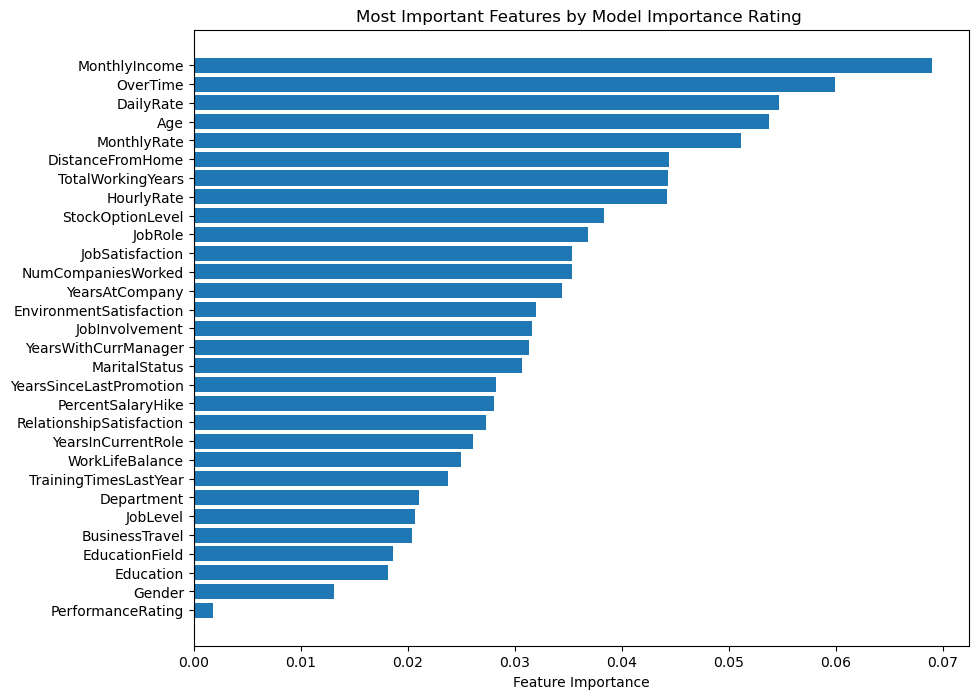

In [65]:
importance_sorted_desc = df_importance.sort_values(by='Average Importance')
plt.figure(figsize=(10,8))
#cmap = plt.get_cmap('viridis')
#col = cmap(np.linspace(0,1, 30))
plt.barh(importance_sorted_desc['Feature'], importance_sorted_desc['Average Importance'])
plt.title('Most Important Features by Model Importance Rating ')
plt.xlabel('Feature Importance')
plt.savefig('FeatureImportanceModels.png', bbox_inches='tight')
plt.show()

In [44]:
shap_normalized = shap_values_abs/ np.sum(shap_values_abs)


In [45]:
df_importance['SHAP'] = shap_normalized

In [46]:
df_importance.tail()

,Feature,Normalized_RF,Normalized_XGB,Normalized_LGBM,Average Importance,SHAP
25,WorkLifeBalance,0.026331,0.028257,0.020333,0.024974,0.029642
26,YearsAtCompany,0.041538,0.033741,0.028000,0.034427,0.017836
27,YearsInCurrentRole,0.027438,0.031027,0.020000,0.026155,0.014183
28,YearsSinceLastPromotion,0.025440,0.031991,0.027333,0.028255,0.023514
29,YearsWithCurrManager,0.030844,0.032285,0.031000,0.031376,0.051810


In [47]:
df_importance['Final Importance'] = df_importance.iloc[:,1:].mean(axis=1)
df_importance

,Feature,Normalized_RF,Normalized_XGB,Normalized_LGBM,Average Importance,SHAP,Final Importance
0,Age,0.062858,0.035668,0.062667,0.053731,0.060475,0.055080
1,BusinessTravel,0.014146,0.028617,0.018333,0.020366,0.029860,0.022264
2,DailyRate,0.054801,0.020901,0.088333,0.054679,0.047659,0.053275
3,Department,0.012053,0.044533,0.006667,0.021084,0.010846,0.019037
4,DistanceFromHome,0.052919,0.028037,0.052333,0.044430,0.056752,0.046894
5,Education,0.019788,0.022844,0.012000,0.018211,0.010928,0.016754
6,EducationField,0.023107,0.018529,0.014333,0.018657,0.009271,0.016779
7,EnvironmentSatisfaction,0.026816,0.037604,0.031667,0.032029,0.046122,0.034847
8,Gender,0.009779,0.020137,0.009333,0.013083,0.016208,0.013708
9,HourlyRate,0.048927,0.020737,0.063000,0.044221,0.017579,0.038893


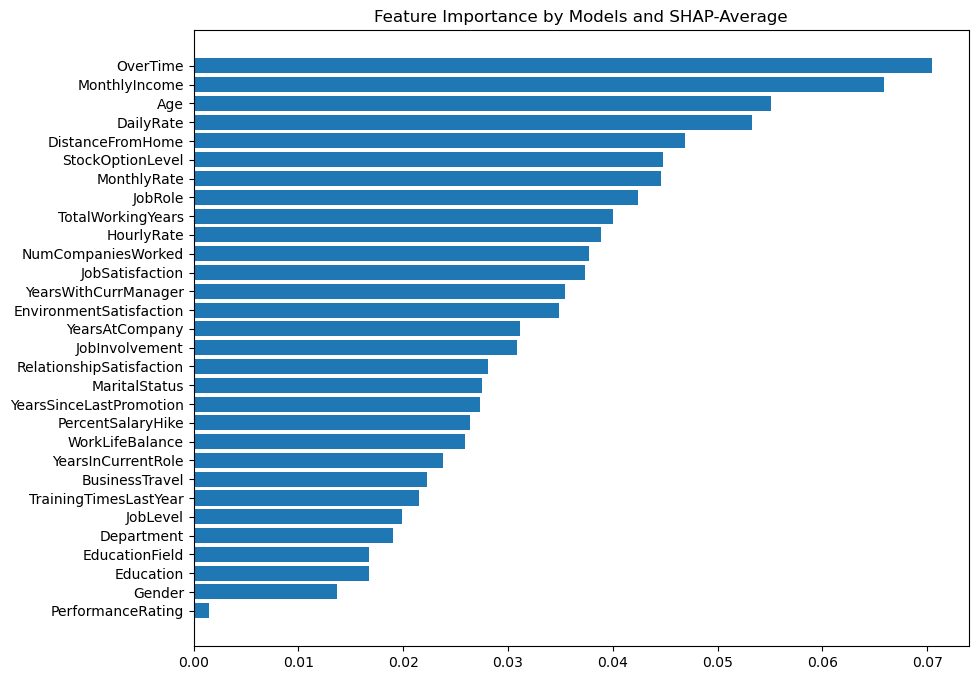

In [84]:
final_df = df_importance.sort_values(by='Final Importance')
cmap = plt.get_cmap('viridis')
plt.figure(figsize=(10,8))
plt.barh(final_df['Feature'], final_df['Final Importance'])
plt.title('Feature Importance by Models and SHAP-Average')
plt.savefig('finalFeatureImportance.png', bbox_inches='tight')
plt.show()

In [57]:
plt.savefig('FeatureImportanceModelsAndSHAP.png')

<Figure size 640x480 with 0 Axes>

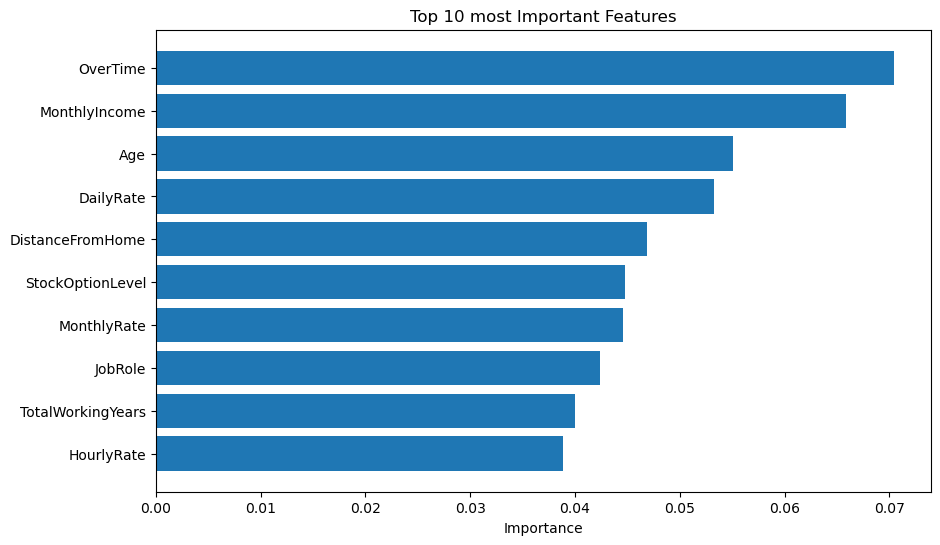

In [93]:
sorted_df = final_df.sort_values(by='Final Importance', ascending=False)
plt.figure(figsize=(10,6))
plt.barh(sorted_df['Feature'][:10], sorted_df['Final Importance'][:10])
plt.gca().invert_yaxis()
plt.title('Top 10 most Important Features')
plt.xlabel('Importance')
plt.savefig('Top10MostImportantFeatures.png', bbox_inches='tight')
plt.show()